                            OLS Regression Results                            
Dep. Variable:           Grocery_Bill   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     908.0
Date:                Wed, 03 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:56:12   Log-Likelihood:                -4955.7
No. Observations:                1000   AIC:                             9923.
Df Residuals:                     994   BIC:                             9953.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            65.6863      3.52

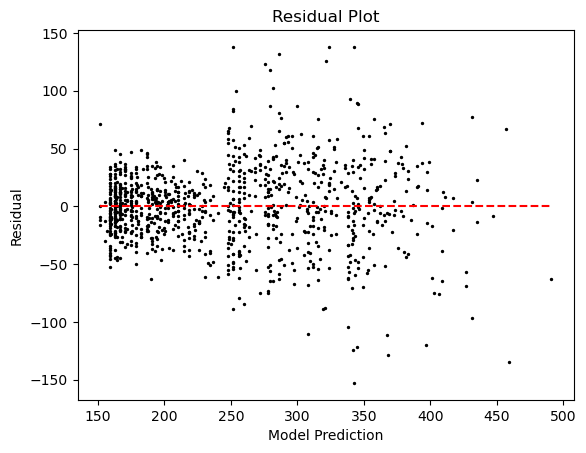

Mean of Residuals: 6.933760232641362e-13


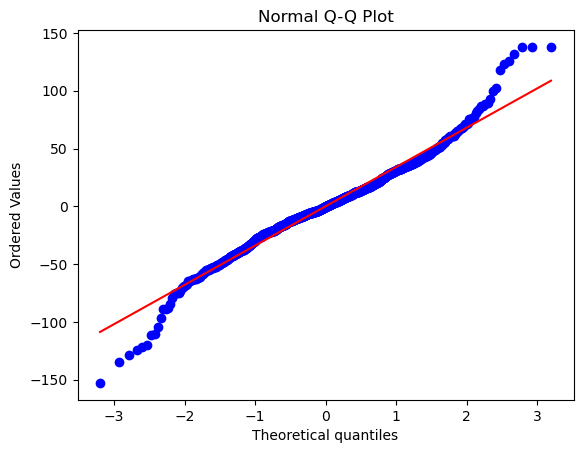

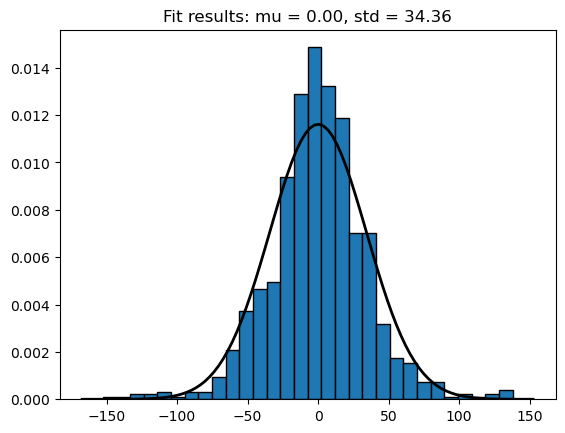

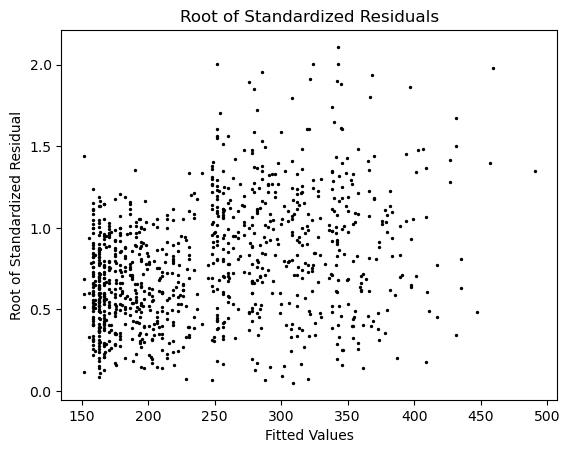

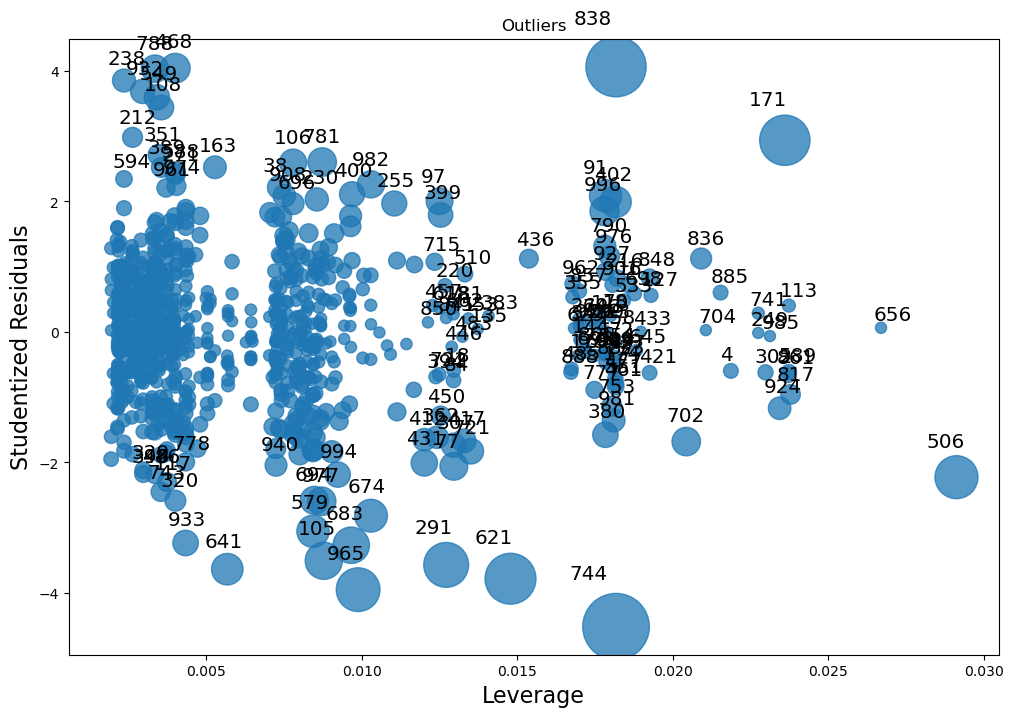

In [43]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from scipy.stats import norm, probplot
from sklearn.preprocessing import StandardScaler

# Function to load data
def load_data(file_path, sheet_name):
    data = pd.read_csv(data_path)
    data['Grocery_Bill'] = data['Grocery_Bill'].replace(r'\$','',regex = True).astype(float)
    return data

# Function to run an OLS regression using a formula interface
def run_ols_formula(data, formula):
    model = ols(formula, data).fit()
    return model

def run_and_diagnose_regression(file_path, sheet_name, formula):
    data = load_data(file_path, sheet_name)
    model = ols(formula, data).fit()
    print(model.summary())

    # Generate predictions and residuals
    predictions = model.predict(data)
    residuals = data[formula.split('~')[0].strip()] - predictions  # Extracting response variable from formula

    # Plotting all diagnostics
    plot_residuals(predictions, residuals)
    plot_qq(residuals)
    plot_histogram_with_fit(residuals)
    plot_standardized_residuals(predictions, residuals)
    plot_cooks_distance(model)

# Function to plot residuals
def plot_residuals(predictions, residuals):
    plt.scatter(predictions, residuals, s=2, color='black')
    plt.hlines(0, min(predictions), max(predictions), color='red', linestyles='dashed')
    plt.xlabel("Model Prediction")
    plt.ylabel("Residual")
    plt.title("Residual Plot")
    plt.show()
    print('Mean of Residuals:', residuals.mean())

# Function to plot a Q-Q plot
def plot_qq(residuals):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    probplot(residuals, dist='norm', plot=ax)
    plt.title("Normal Q-Q Plot")
    plt.show()

# Function to plot histogram of residuals with fitted normal distribution
def plot_histogram_with_fit(residuals):
    mean, std = norm.fit(residuals)
    plt.hist(residuals, bins=30, edgecolor='black', density=True)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = f"Fit results: mu = {mean:.2f}, std = {std:.2f}"
    plt.title(title)
    plt.show()

# Function to plot standardized residuals
def plot_standardized_residuals(predictions, residuals):
    # Convert the Pandas Series to a NumPy array and reshape it
    residuals_array = residuals.values.reshape(-1, 1)
    scaler = StandardScaler().fit(residuals_array)
    norm_residuals = scaler.transform(residuals_array)

    plt.scatter(predictions, np.sqrt(np.abs(norm_residuals)), c='black', s=2)
    plt.xlabel("Fitted Values")
    plt.ylabel("Root of Standardized Residual")
    plt.title("Root of Standardized Residuals")
    plt.show()


# Function to plot Cook's distance
def plot_cooks_distance(model):
    fig, ax = plt.subplots(figsize=(12,8))
    sm.graphics.influence_plot(model, ax=ax, criterion="cooks")
    plt.title("Outliers")
    plt.show()

# Example usage
import os

#Use the read_excel function to pull data from the 'Sales Data' sheet
db_dir = os.getcwd()
data_path = db_dir + '/MMA_860_Grocery_Data.csv'
formula = 'Grocery_Bill ~ N_Adults + Family_Size + Distance_to_Store  + N_Children + Vegetarian + Family_Pet' 
# model = run_ols_formula(data, formula)
# print(model.summary())
sheet_name = 'Outliers'
run_and_diagnose_regression(data_path,sheet_name,formula)


In [34]:
db_dir = os.getcwd()
data_path = db_dir + '/MMA_860_Grocery_Data.csv'
data = pd.read_csv(data_path)
data['Grocery_Bill'] = data['Grocery_Bill'].replace(r'\$','',regex = True).astype(float)
data.dtypes


formula = 'Grocery_Bill ~ Family_Size + Distance_to_Store  + N_Children + Vegetarian + N_Children + Family_Pet' 
model = ols(formula, data).fit()
print('25 Observations: Y ~ Height + Experience + Distance_to_Store + Vegetarian + N_Children + Family_Pet')
model = ols(formula,data).fit()
print(model.summary())

25 Observations: Y ~ Height + Experience + Distance_to_Store + Vegetarian + N_Children + Family_Pet
                            OLS Regression Results                            
Dep. Variable:           Grocery_Bill   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     908.7
Date:                Wed, 03 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:20:41   Log-Likelihood:                -4955.4
No. Observations:                1000   AIC:                             9923.
Df Residuals:                     994   BIC:                             9952.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------